## Building Traffic Sign Classifier using <font color = "Blue">GTSRB</font> dataset from scratch.

### Importing the required libraries

In [135]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image 

np.random.seed(42)

import os

### Mentioning the required paths

In [2]:
base_path = "./data/gtsrb_german_traffic_sign"
train_path = "./data/gtsrb_german_traffic_sign/Train"
test_path = "./data/gtsrb_german_traffic_sign/Test"

In [3]:
no_of_classes = len(os.listdir(train_path))
print(no_of_classes)

43


### Extracting rows from signames.csv files

In [4]:
dataframe = pd.read_csv("./data/signnames.csv")

#################################################################################
# Extracting the rows using open(file_name_here).read().strip().split("\n")[1:] #
#################################################################################
rows = open("./data/signnames.csv").read().strip().split("\n")[1:]

class_id = [r_.split(",")[0] for r_ in rows]
class_names = [r_.split(",")[1] for r_ in rows]

class_def = {}

for ele in zip(class_id, class_names):
    class_def[int(ele[0])] = ele[1]

In [5]:
class_def # To see how the structure is defined here.

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

### Extract **data** and **labels** for visualizing

First we'll see how many number of training data is present in the given dataset.
By plotting a garph against it, will give us a better intuition of the same.

In [6]:
################################
## Visualizing the train data ##
################################

# Creating lists to append values
count_train = []
count_folder = []

folders_ = os.listdir(train_path) # listdir allows you to retrieve the folders from the provided path

for folder in folders_:
    train_data = os.listdir(train_path + '/' + folder)
    count_train.append(len(train_data))
    count_folder.append(class_def[int(folder)])

# print(count_train, count_folder) to view the structure


# Sorting the dataset based on count_train
## Understanding zip() - zip() returns an iterator that can generate tuples wiht paired elements
zipped_train = zip(count_train, count_folder)
zipped_train_sort = sorted(zipped_train)

## Change the same to tuple to fetch the required data.
zipped_train_tup = zip(*zipped_train_sort)

## Extract the sorted count_train and count_folder
count_train_sort, count_folder_sort = [list(tup) for tup in zipped_train_tup]

### Plotting bar plot based on the retrieved data

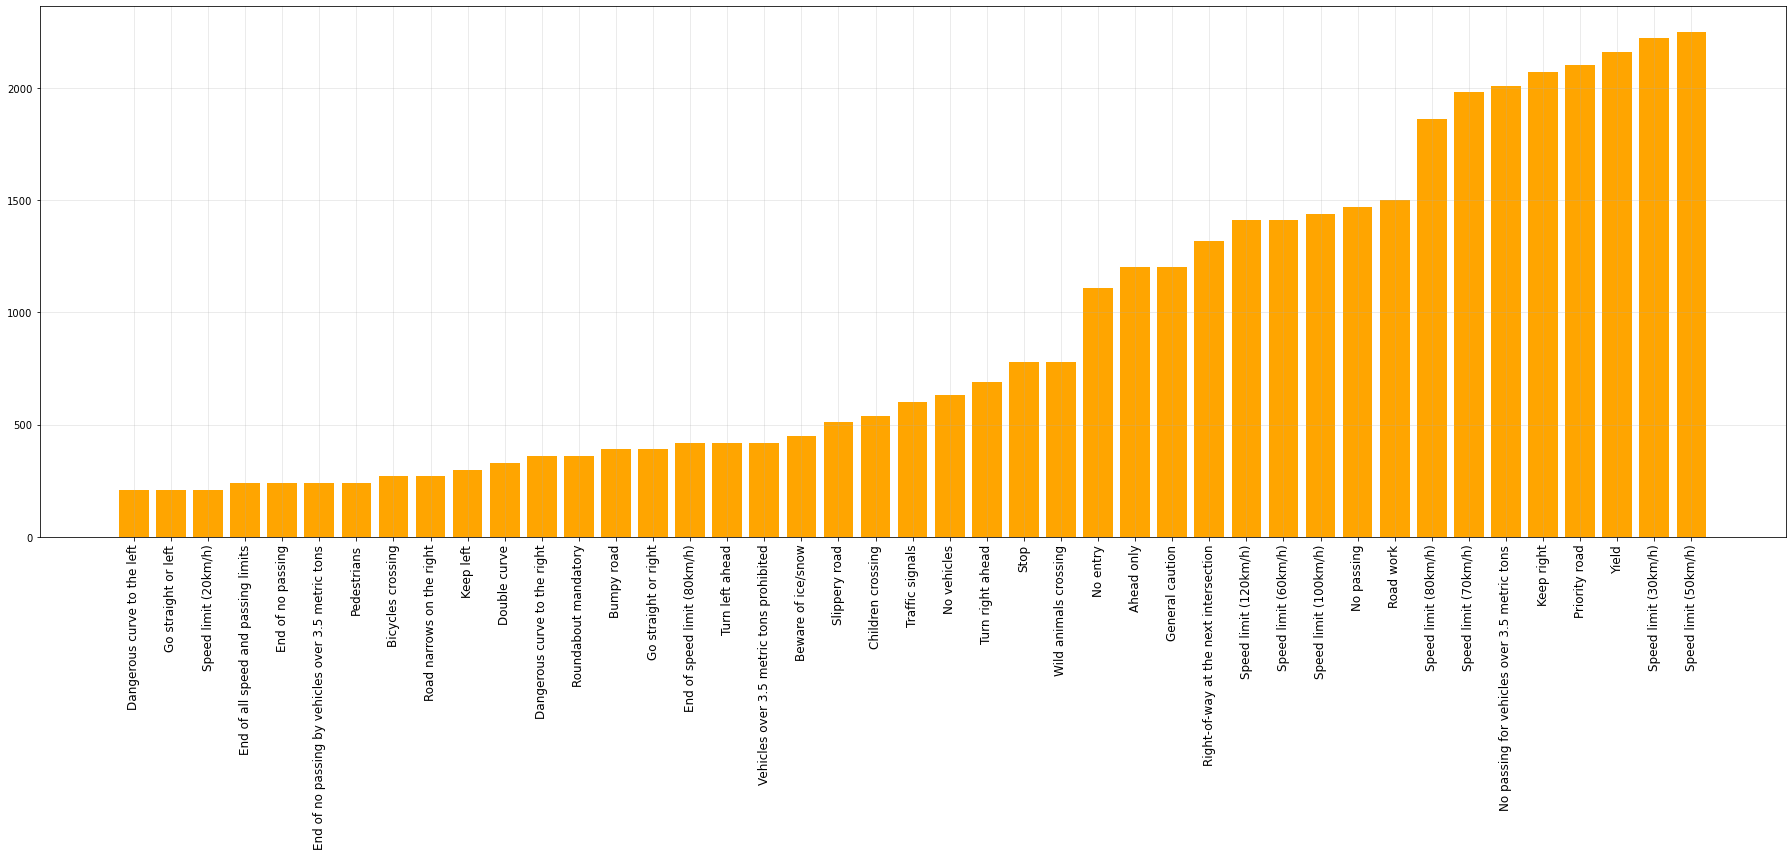

In [7]:
plt.figure(figsize = (25, 12))
plt.grid(alpha = 0.3)
ax = plt.bar(count_folder_sort, count_train_sort, color = "orange")

# for i in plt.patches:
#     plt.text(i.get_width() + 0.2, i.get_y() + 0.5, str(round(i.get_width()), 2),
#             font_size = 10, font_width = 'bold')
plt.xticks(count_folder, rotation = "vertical", fontsize = 12)

plt.tight_layout()
plt.show()

### Visualizing the the test dataset
We'll pick 20 random images for our inspection and get the intuition of the test data.

In [8]:
##################################
## Visualizing the test dataset ##
##################################

import random
from matplotlib.image import imread

test_df = pd.read_csv(base_path + '/Test.csv')

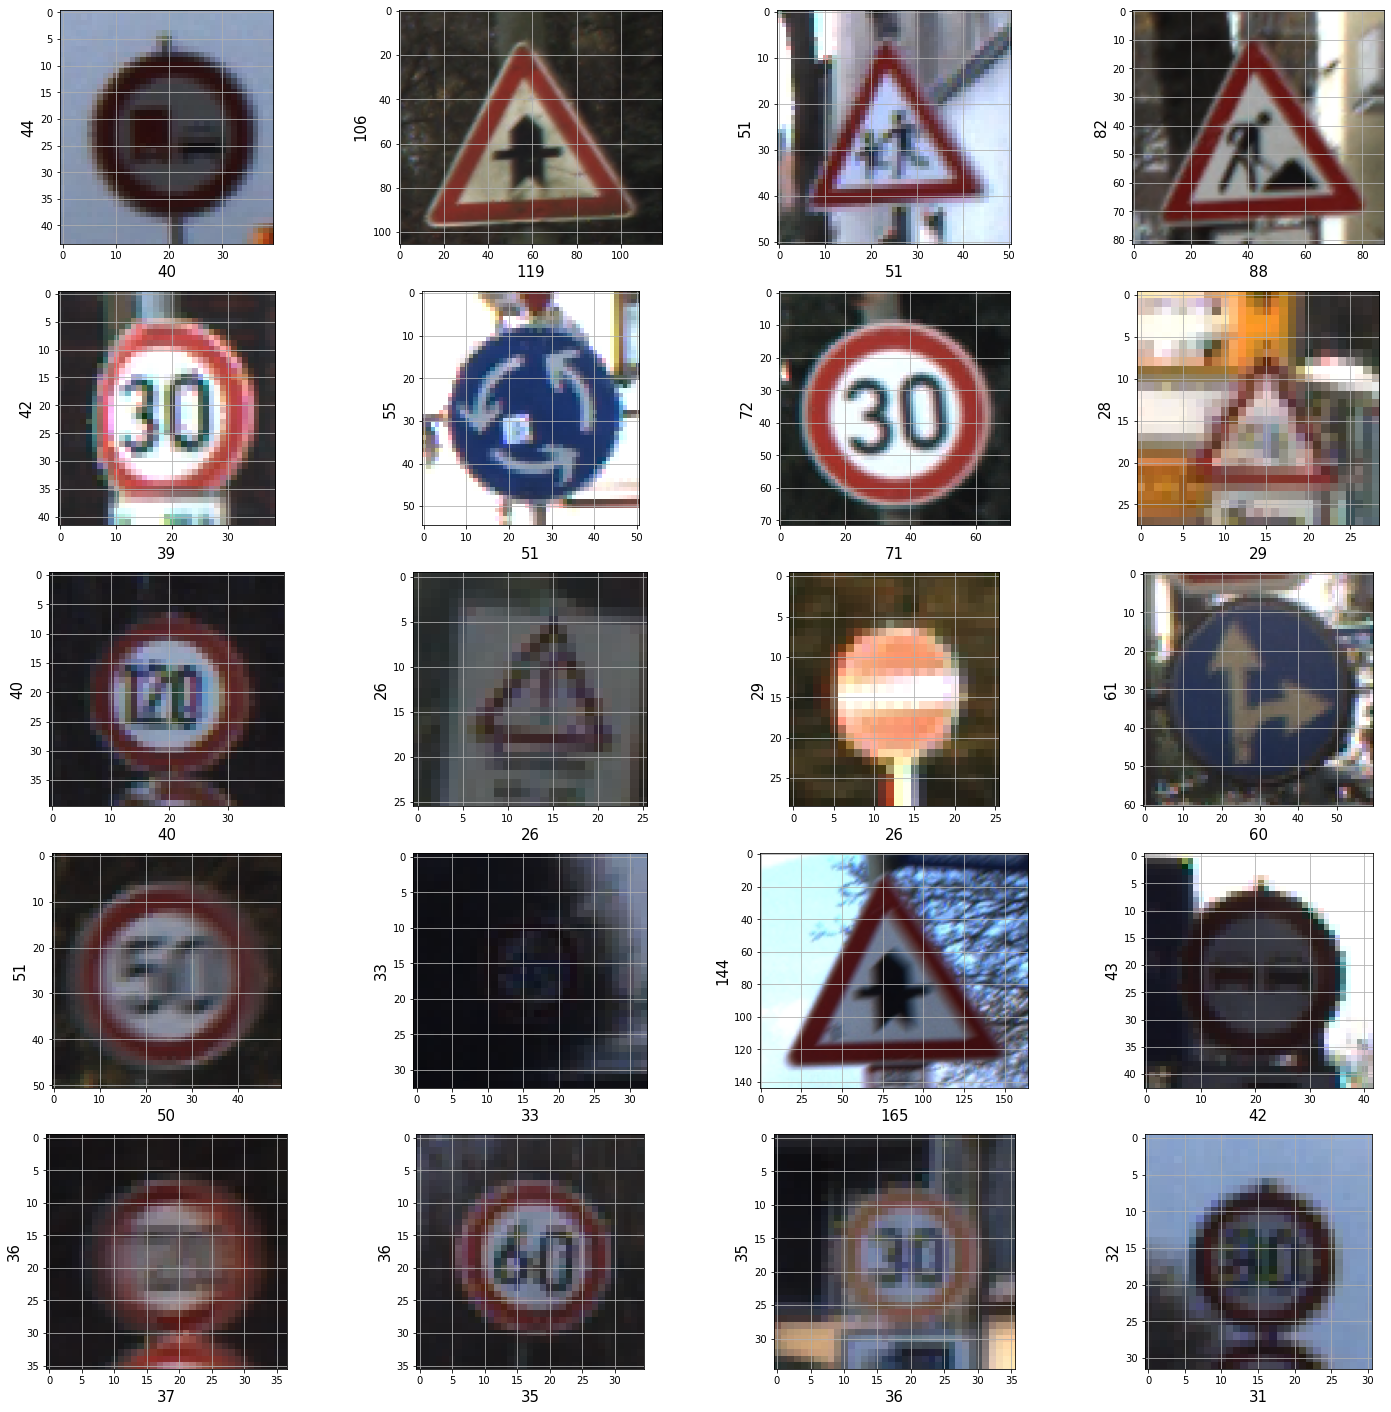

In [9]:
img_path = test_df["Path"].values

plt.figure(figsize = (25, 25))

for i in range(1, 21):
    plt.subplot(5,4,i)
    
    full_path = base_path + "/" + random.choice(img_path)
    img_p = plt.imread(full_path)
    plt.imshow(img_p)
    plt.grid(b=None)
    plt.xlabel(img_p.shape[1], fontsize=15) # Width of the image
    plt.ylabel(img_p.shape[0], fontsize=15) # Height of the image

### Fetching the training data

In [10]:
########################################
## split_data returns data and labels ##
########################################

data = []
labels = []

## Defining the dimensions for the images for training
IMG_HEIGHT = 30
IMG_WIDTH = 30
CHANNELS = 3

## Defining the function to fetch data and labels
def fetch_data(base_path, train_path):
    
    print(f'START: Fetching has started...')
    
    img_data = []
    img_labels = []
    
    for i in range(no_of_classes):
        train_img_path = train_path + '/' + str(i)
        train_folder = os.listdir(train_img_path)

        for files in train_folder:
            
            try:
                # img_p = plt.imread(train_img_path + '/' + files)
                img_p = cv2.imread(train_img_path + '/' + files)
                img_from_array = Image.fromarray(img_p, 'RGB')
                img_resize = img_from_array.resize((IMG_HEIGHT, IMG_WIDTH))
                
                img_data.append(np.array(img_resize))
                img_labels.append(i)
                
            except:
                print(f'NOTE: There has been some error in the file : {files}')
     
    img_data = np.array(img_data)
    img_labels = np.array(img_labels)

    print(f'FINISH: All the image data and teh corresponding labels have been fetched!')
    return img_data, img_labels

In [11]:
img_data, img_labels = fetch_data(base_path, train_path)

START: Fetching has started...
FINISH: All the image data and teh corresponding labels have been fetched!


In [12]:
print(img_data.shape, img_labels.shape)

(39209, 30, 30, 3) (39209,)


### Shuffling the training data

In [13]:
# Fetching the indexes for shuffling
index_shuffle = np.arange(img_data.shape[0])
np.random.shuffle(index_shuffle)

# Shuffled image data
img_data_shfl = img_data[index_shuffle]       # Shuffled image data
img_labels_shfl = img_labels[index_shuffle]   # Shuffled image labels

### Splitting the data into training and validation set
We are going to split the whole training dataset into training set and validation set.
* Split the data into training and validation, training(**80%**) and validation(**30%**)
* Setting random state as 0, though any random state can be mentioned
* Setting shuffle as **true**

In [14]:
# Splitting the data into training set and validation set.
x_train, x_val, y_train, y_val = train_test_split(img_data_shfl, img_labels_shfl, test_size = 0.3, random_state = 40, shuffle = True)

# Scaling down the images and type casting to float32 to reduce computational requirement.
x_train_scaled_cast = x_train.astype("float32") / 255.0
x_val_scaled_cast = x_val.astype("float32") / 255.0

# Print the shape of the train set and val set.
print(f'x_train shape : {x_train.shape}')
print(f'x_val shape   : {x_val.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_val shape   : {y_val.shape}')

x_train shape : (27446, 30, 30, 3)
x_val shape   : (11763, 30, 30, 3)
y_train shape : (27446,)
y_val shape   : (11763,)


### Applying <font color = "Red">one-hot encoding</font> the labels

In [15]:
# Applying one-hot encoding using to_categorical from keras.utils
y_train = keras.utils.to_categorical(y_train, no_of_classes)
y_val = keras.utils.to_categorical(y_val, no_of_classes)

# Printing the shape of the labels for train and val set.
print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


### Model Creation
The below model has been created using the **Sequential API**, however, this can also be created using the Functional API.

In [16]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 128)         7

### Compiling the model

In [17]:
# Initialing the required hyperparameters
LEARNING_RATE = 1e-3
BATCH_SIZE = 32
EPOCHS = 30

model.compile(
    loss = keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = LEARNING_RATE, decay = LEARNING_RATE/EPOCHS*0.5),
    metrics = ["accuracy"]
)

### Training the model
But, before training, for better training our model, we must perform some **Augmentation** which introduces noises, contrast, brightness, blur, rotations, scaling and many such pixel-level ane geometric level transformations. To perform augmentation, we'll use ImageDataGenerator from **tensorflow.keras.preprocessing.image**

In [18]:
# Applying augmentation using ImageDataGenerator
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

#### Training the model using aug.flow()

In [19]:
model_hist = model.fit(
                    aug.flow(x_train, y_train, batch_size = BATCH_SIZE),
                    epochs = EPOCHS,
                    validation_data = (x_val, y_val))
          

Epoch 1/30
858/858 [==============================] - 99s 115ms/step - loss: 1.2717 - accuracy: 0.6553 - val_loss: 0.1830 - val_accuracy: 0.9447
Epoch 2/30
858/858 [==============================] - 104s 121ms/step - loss: 0.2160 - accuracy: 0.9336 - val_loss: 0.0581 - val_accuracy: 0.9833
Epoch 3/30
858/858 [==============================] - 106s 124ms/step - loss: 0.1401 - accuracy: 0.9571 - val_loss: 0.0211 - val_accuracy: 0.9942
Epoch 4/30
858/858 [==============================] - 124s 144ms/step - loss: 0.0940 - accuracy: 0.9706 - val_loss: 0.0294 - val_accuracy: 0.9906
Epoch 5/30
858/858 [==============================] - 110s 128ms/step - loss: 0.0780 - accuracy: 0.9773 - val_loss: 0.0104 - val_accuracy: 0.9975
Epoch 6/30
858/858 [==============================] - 105s 122ms/step - loss: 0.0774 - accuracy: 0.9769 - val_loss: 0.0239 - val_accuracy: 0.9935
Epoch 7/30
858/858 [==============================] - 102s 119ms/step - loss: 0.0618 - accuracy: 0.9800 - val_loss: 0.0181 - 

### Model Evaluation

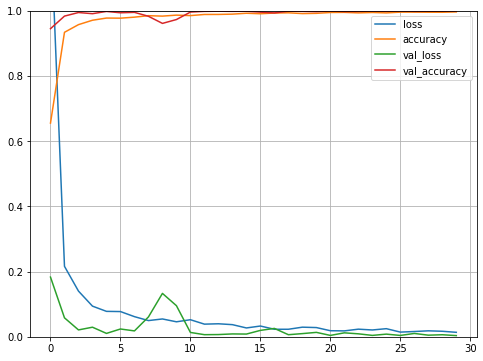

In [21]:
pd.DataFrame(model_hist.history).plot(figsize = (8, 6))
plt.grid()
plt.gca().set_ylim(0,1) # gca() -> get the current axes on the current figure.
plt.show()

### Loading the test data and fetching the predictions

In [80]:
data_test = []

test_csv_path = base_path + '/Test.csv'
test_data_from_csv = pd.read_csv(test_csv_path)

# print(test_data_from_csv)

test_img = test_data_from_csv["Path"].values
test_labels = test_data_from_csv["ClassId"].values

def fetch_test(base_path):
    print("START: Fetching test data...")
    for image in test_img:
        try:
            test_full_path = base_path + '/' + image
#             print(test_full_path)
            img_c = cv2.imread(test_full_path)
            img_from_arr = Image.fromarray(img_c, 'RGB')
            img_resize_test = img_from_arr.resize((IMG_HEIGHT, IMG_WIDTH))
            data_test.append(np.array(img_resize_test))
            
        except:
            print(f'Failed image: {image}')
    
    # Converting the data_test into numpy array
    x_test = np.array(data_test)
    print("FINISH: The required data has been retrieved.")
    
    return x_test

In [81]:
x_test = fetch_test(base_path)
print(x_test.shape)

START: Fetching test data...
FINISH: The required data has been retrieved.
(12630, 30, 30, 3)


In [82]:
# predict = model.predict_classes(x_test)
y_pred = model.predict(x_test)
pred = np.argmax(y_pred, axis=1)

print(f'Accuracy: {accuracy_score(test_labels, pred)*100}')



Accuracy: 98.50356294536817


### <font color = "Red">Confusion Matrix</font> Visualization

#### Why do we need a confusion matrix?
A confusion matrix is a table that is being used to visualize how good the classifier is performing on a set of test data for which true values are known and thereby giving us a better insight of the **Accuracy**, **Precision** and **Recall** for the same.

* Accuracy = $ \displaystyle \frac{(TP + TN)}{(TP + FP + TN + FN)} $


* Precision = $ \displaystyle \frac{(TP)}{(TP + FP)} $


* Recall = $ \displaystyle \frac{(TP)}{(TP + FN)} $

For visualization, we'll use heatmap from seaborn. Thereby, we must import seaborn here, for us to use.

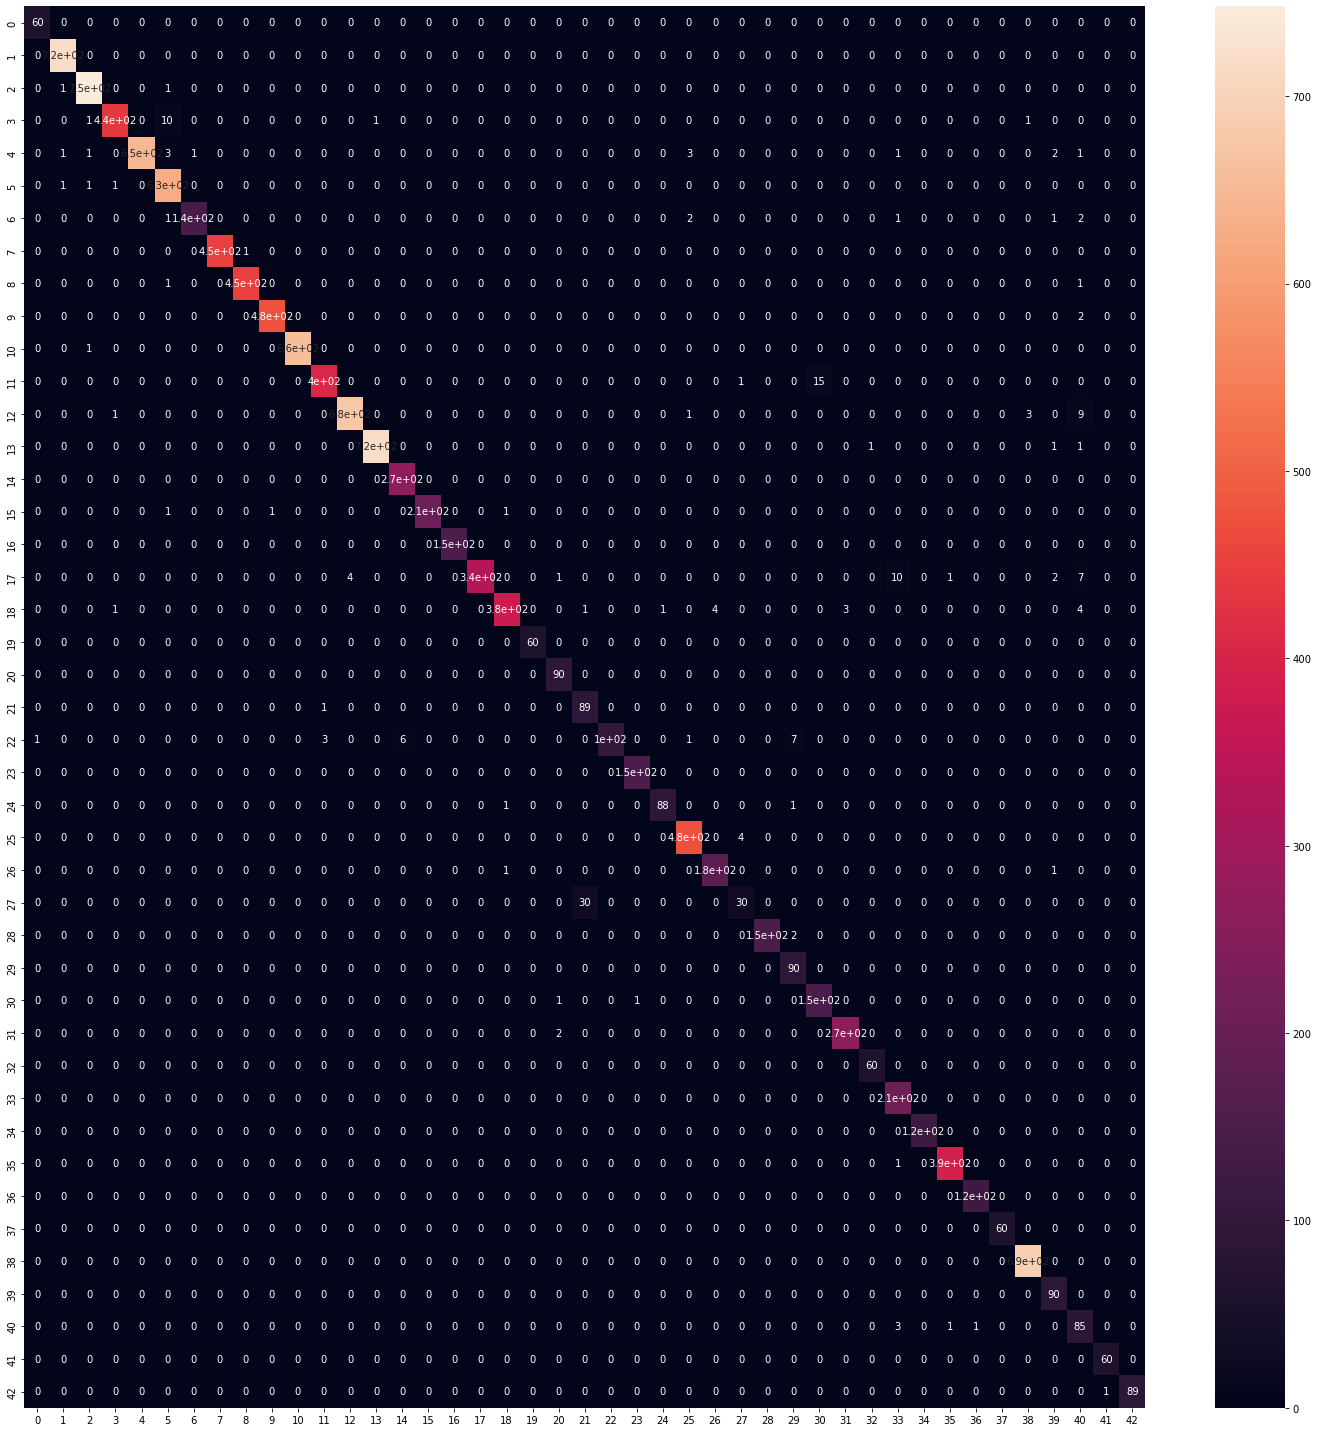

In [94]:
# Starting with the confusion matrix visualization

## Importing confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix

## The confusion_matrix can be fetched using in-built function confusion_matrix, passing args ->
## test_labels and corresponding predicted value.
conf_mat = confusion_matrix(test_labels, pred)

## Fetching confusion_matrix dataframe
conf_mat_df = pd.DataFrame(conf_mat, index = class_def, columns = class_def)

## Importing Seaborn for the visualization
import seaborn as sns

plt.figure(figsize = (20,20))
sns.heatmap(conf_mat_df, annot = True)

plt.tight_layout()
plt.show()

### Generating <font color= "Blue">Classification Report</font>
___

The classification report consists of parameters:
* Precision
* Recall
* f1-score
* support

Out of these above mmentioned parameters, we've already discussed about precision and recall.
#### Let's understand what f1-score is?

> F-beta score calculation is **performed as same as F1-score**, however, F-beta has an edge over F1 score, as it allows to determine the weightage one would like to give on precison and accuracy as explained below.

* F-beta score is **weighted harmonic mean** of the **Accuracy** and **Precision**, where the F-beta score reaches the best value at **1** and worst at **0**. F-beta score weighs more on precision by a factor of **beta**. Example: If beta = 1, this means that both the accuracy and precision are being weighted equally.

In [96]:
from sklearn.metrics import classification_report

class_report = classification_report(test_labels, pred) 

print(class_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      1.00      1.00       720
           2       0.99      1.00      1.00       750
           3       0.99      0.97      0.98       450
           4       1.00      0.98      0.99       660
           5       0.97      1.00      0.98       630
           6       0.99      0.95      0.97       150
           7       1.00      1.00      1.00       450
           8       1.00      1.00      1.00       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.99      0.96      0.98       420
          12       0.99      0.98      0.99       690
          13       1.00      1.00      1.00       720
          14       0.98      1.00      0.99       270
          15       1.00      0.99      0.99       210
          16       1.00      1.00      1.00       150
          17       1.00    

### Test data predictions

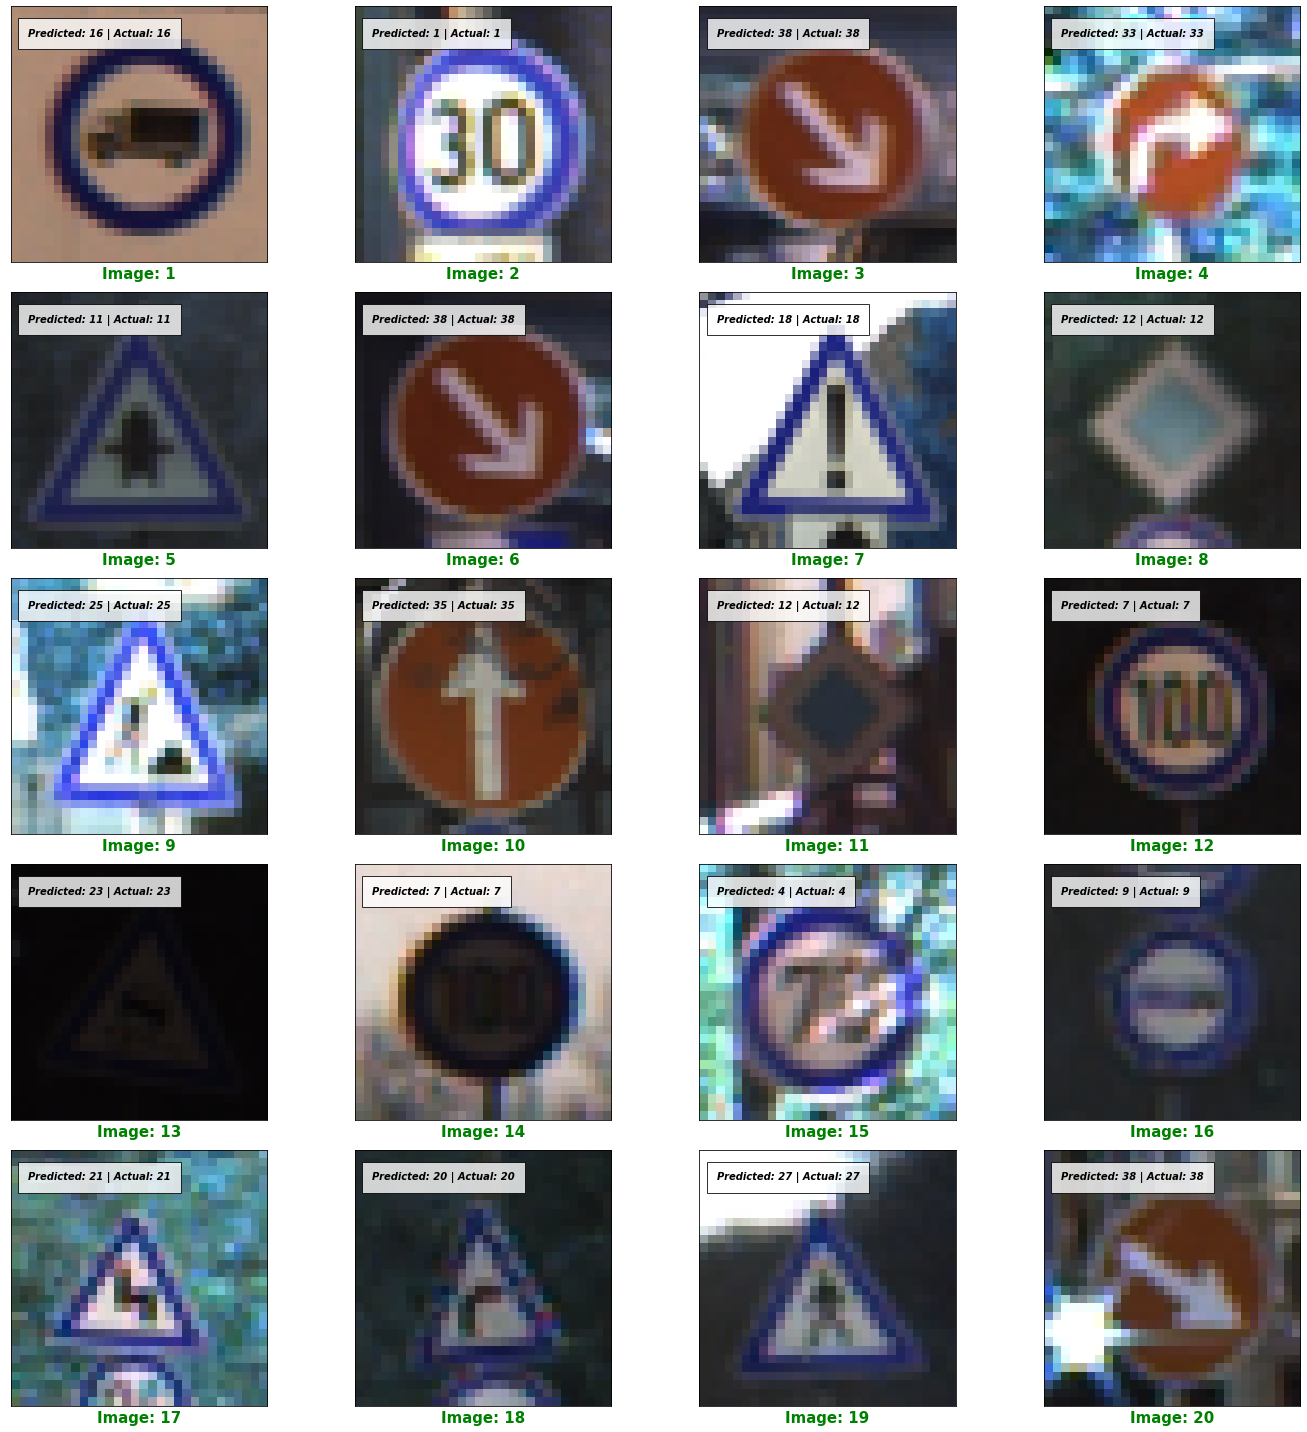

In [134]:
fig_ = plt.figure(figsize = (20, 20))

start_index = 0

for i in range(20):
    ax = plt.subplot(5,4,i+1)
    
    plt.xticks([])
    plt.yticks([])
    
    predict_ = pred[start_index + i]
    actual_ = test_labels[start_index + i]
    
    col = 'g'
    
    if predict_ != actual_:
        col = 'r'

    ax.text(1.5, 3, f'Predicted: {predict_} | Actual: {actual_}', style='italic',
        bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10}, weight = 'bold')
    
    # plt.xlabel(f'Predicted:{predict_} |  Actual:{actual_}', color = col)
    plt.xlabel(f'Image: {start_index+i+1}', color = col, fontsize = 15, fontweight='bold')
    
    plt.imshow(x_test[start_index+i])

plt.tight_layout()
plt.show()

___

## 🚀 About Me
A Mechanical Engineer looking foward to work on self driving cars and be a part of an organization that allows me to explore different related areas of research like visual perception, localization, mapping and path planning. I am looking for collaborations to contribute in the world of self driving cars, if you are interested, let's connect.

### 👋 For more such infomation, connect with me on
***
[![linkedin](https://img.shields.io/badge/linkedin-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/rajdeepforreal/)

[![twitter](https://img.shields.io/badge/twitter-1DA1F2?style=for-the-badge&logo=twitter&logoColor=white)](https://twitter.com/checkwithRaj)